In [1]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
torch.cuda.is_available()

True

In [3]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [4]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [5]:
complete_data

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,1,1.000000,1.000000,5000.0,2.277446,0.000455
1,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,2,1.000000,0.991304,5000.0,220.451716,0.044090
2,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,3,0.997826,1.000000,5000.0,0.389587,0.000078
3,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,4,0.991304,1.000000,5000.0,0.261074,0.000052
4,FullyConvolutionalNetwork1D_articularywordreco...,FullyConvolutionalNetwork1D,articularywordrecognition,5,0.991304,1.000000,5000.0,0.261064,0.000052
...,...,...,...,...,...,...,...,...,...
496,MultiLayerPerceptron_standwalkjump_6,MultiLayerPerceptron,standwalkjump,6,1.000000,0.500000,5000.0,8.519672,0.001704
497,MultiLayerPerceptron_standwalkjump_7,MultiLayerPerceptron,standwalkjump,7,1.000000,0.333333,5000.0,8.507372,0.001701
498,MultiLayerPerceptron_standwalkjump_8,MultiLayerPerceptron,standwalkjump,8,1.000000,0.500000,5000.0,8.522695,0.001705
499,MultiLayerPerceptron_standwalkjump_9,MultiLayerPerceptron,standwalkjump,9,1.000000,0.500000,5000.0,8.554916,0.001711


In [6]:
complete_data.query("model_name == 'InceptionTimeEnsemble'").head(70) #.query("dataset == 'eigenworms'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch


In [7]:
agg_results_data = get_all_results(True)

In [8]:
agg_results_data.model_name.unique()

array(['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DGAP',
       'FullyConvolutionalNetwork1DIntermediate',
       'FullyConvolutionalNetwork1DLate',
       'FullyConvolutionalNetwork1DLateGAP', 'InceptionTime',
       'MultiLayerPerceptron', 'InceptionTimeLate'], dtype=object)

In [9]:
agg_results_data.query("model_name == 'InceptionTime'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
5,articularywordrecognition,InceptionTime,1.000000,0.991304,1.0,99999.0,99999.0
12,atrialfibrillation,InceptionTime,0.604167,0.700000,1.0,99999.0,99999.0
50,standwalkjump,InceptionTime,NaN,NaN,NaN,NaN,NaN


In [10]:
agg_results_data.query("model_name == 'FullyConvolutionalNetwork1DGAP'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
1,articularywordrecognition,FullyConvolutionalNetwork1DGAP,0.998043,0.995652,1223.600000,64.587083,0.055665
8,atrialfibrillation,FullyConvolutionalNetwork1DGAP,1.000000,0.433333,2520.500000,37.317006,0.014806
16,basicmotions,FullyConvolutionalNetwork1DGAP,1.000000,1.000000,4.600000,0.049344,0.010593
22,cricket,FullyConvolutionalNetwork1DGAP,0.981944,1.000000,12.400000,0.417166,0.034725
28,eigenworms,FullyConvolutionalNetwork1DGAP,1.000000,0.927350,3213.333333,3051.144425,0.958434
34,natops,FullyConvolutionalNetwork1DGAP,0.993403,0.995833,876.300000,28.284067,0.033378
40,racketsports,FullyConvolutionalNetwork1DGAP,1.000000,0.936066,2632.200000,135.415578,0.051074
46,standwalkjump,FullyConvolutionalNetwork1DGAP,1.000000,0.500000,2527.000000,66.115840,0.026158


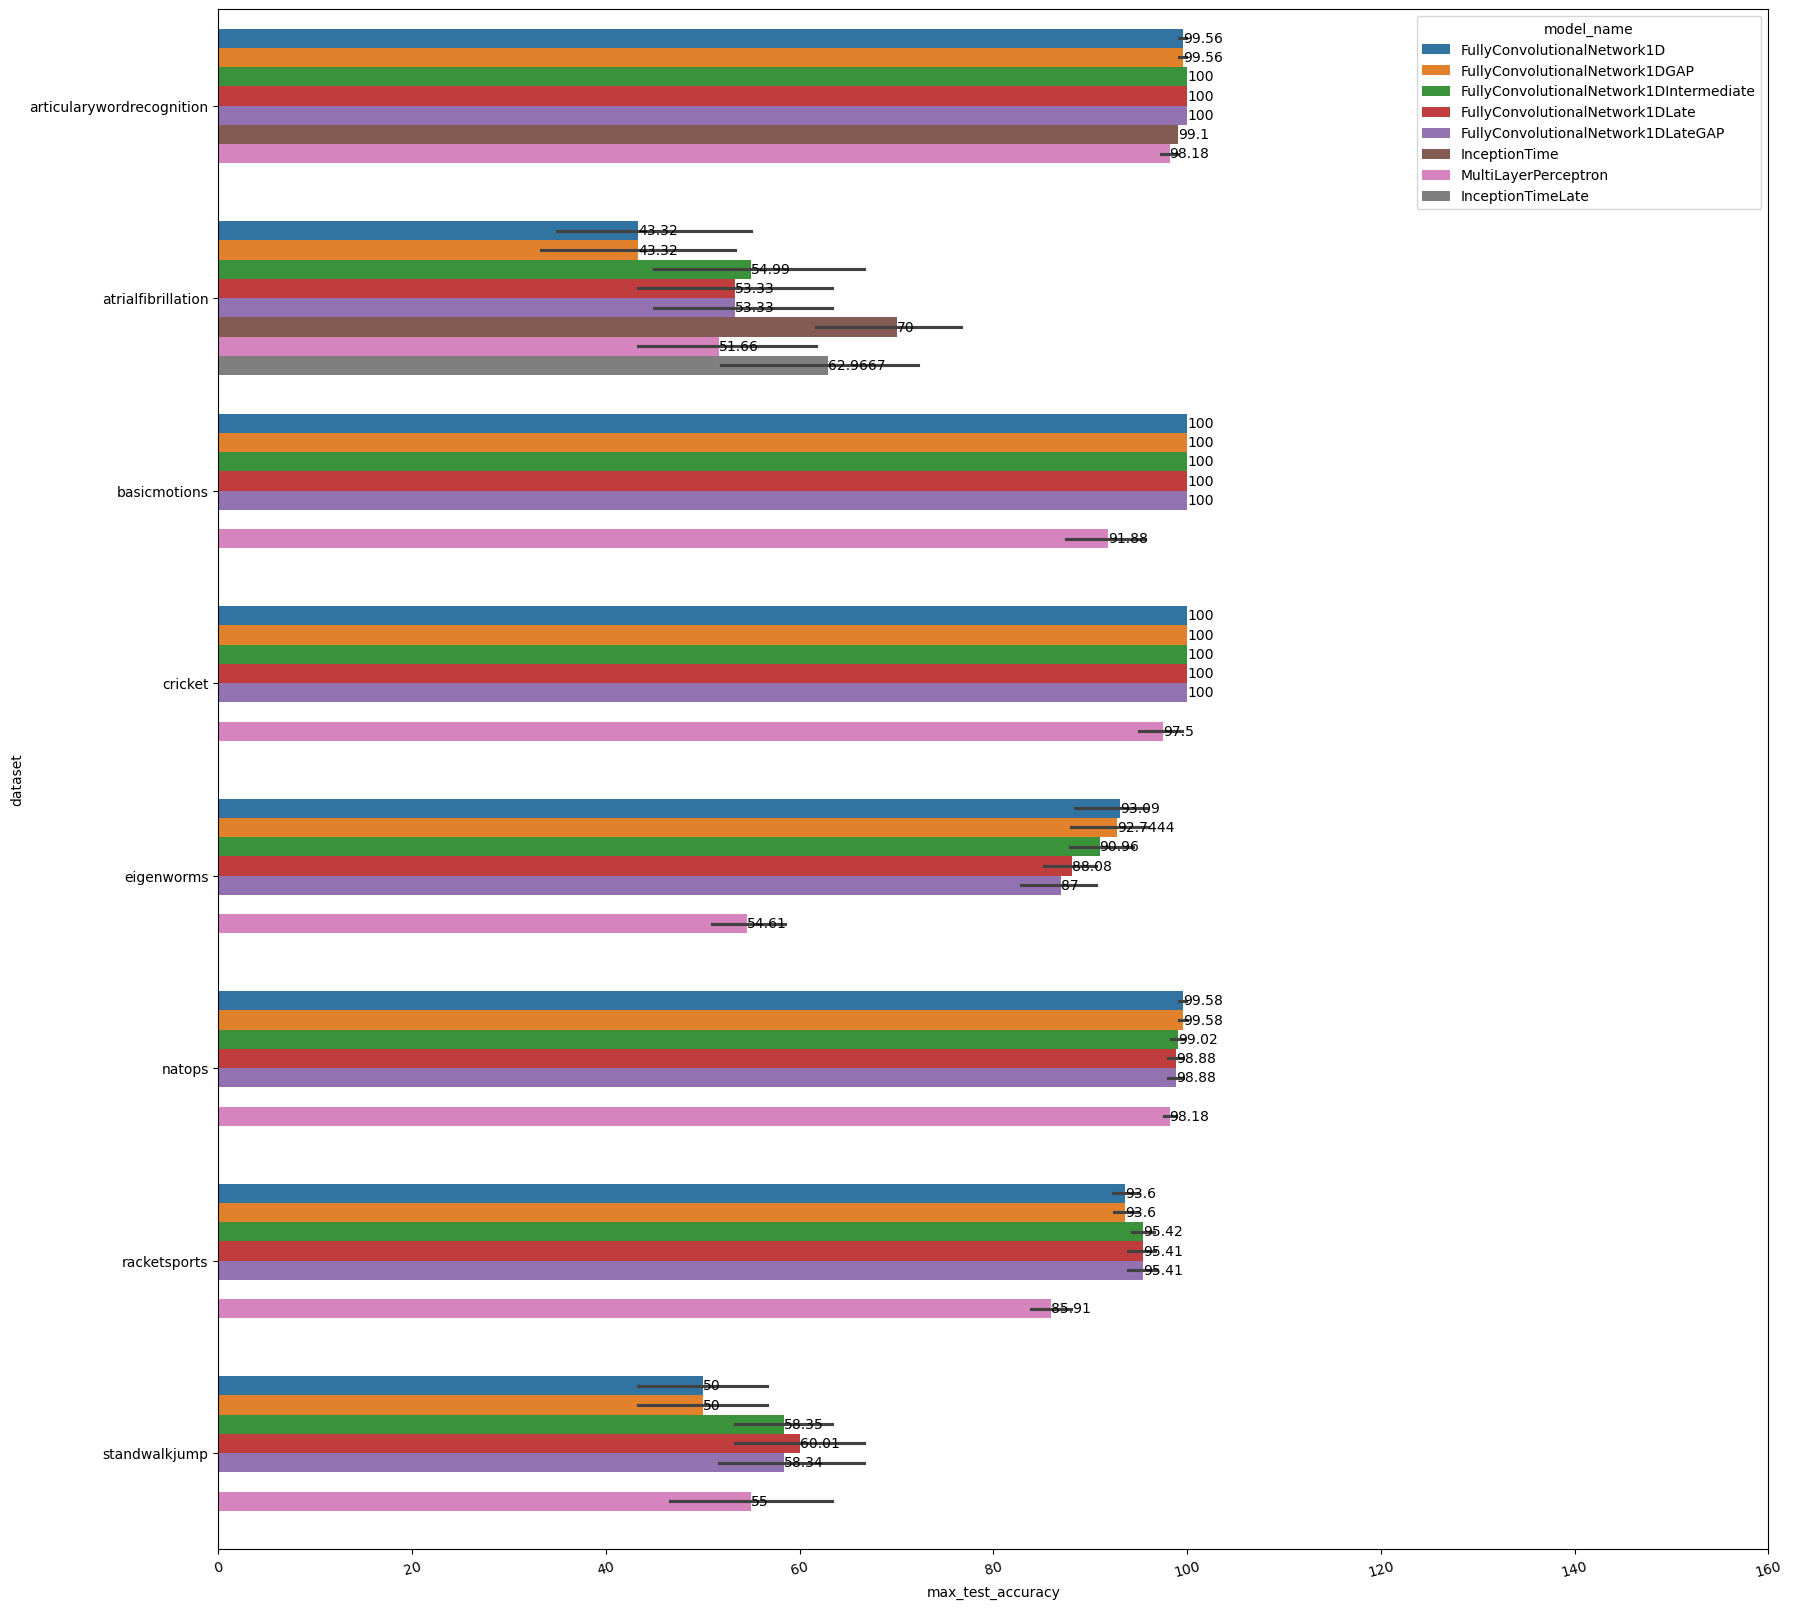

In [11]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = complete_data.query("model_name != 'InceptionTimeASDASDASD'"), 
    y = 'dataset', 
    x = 100*complete_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

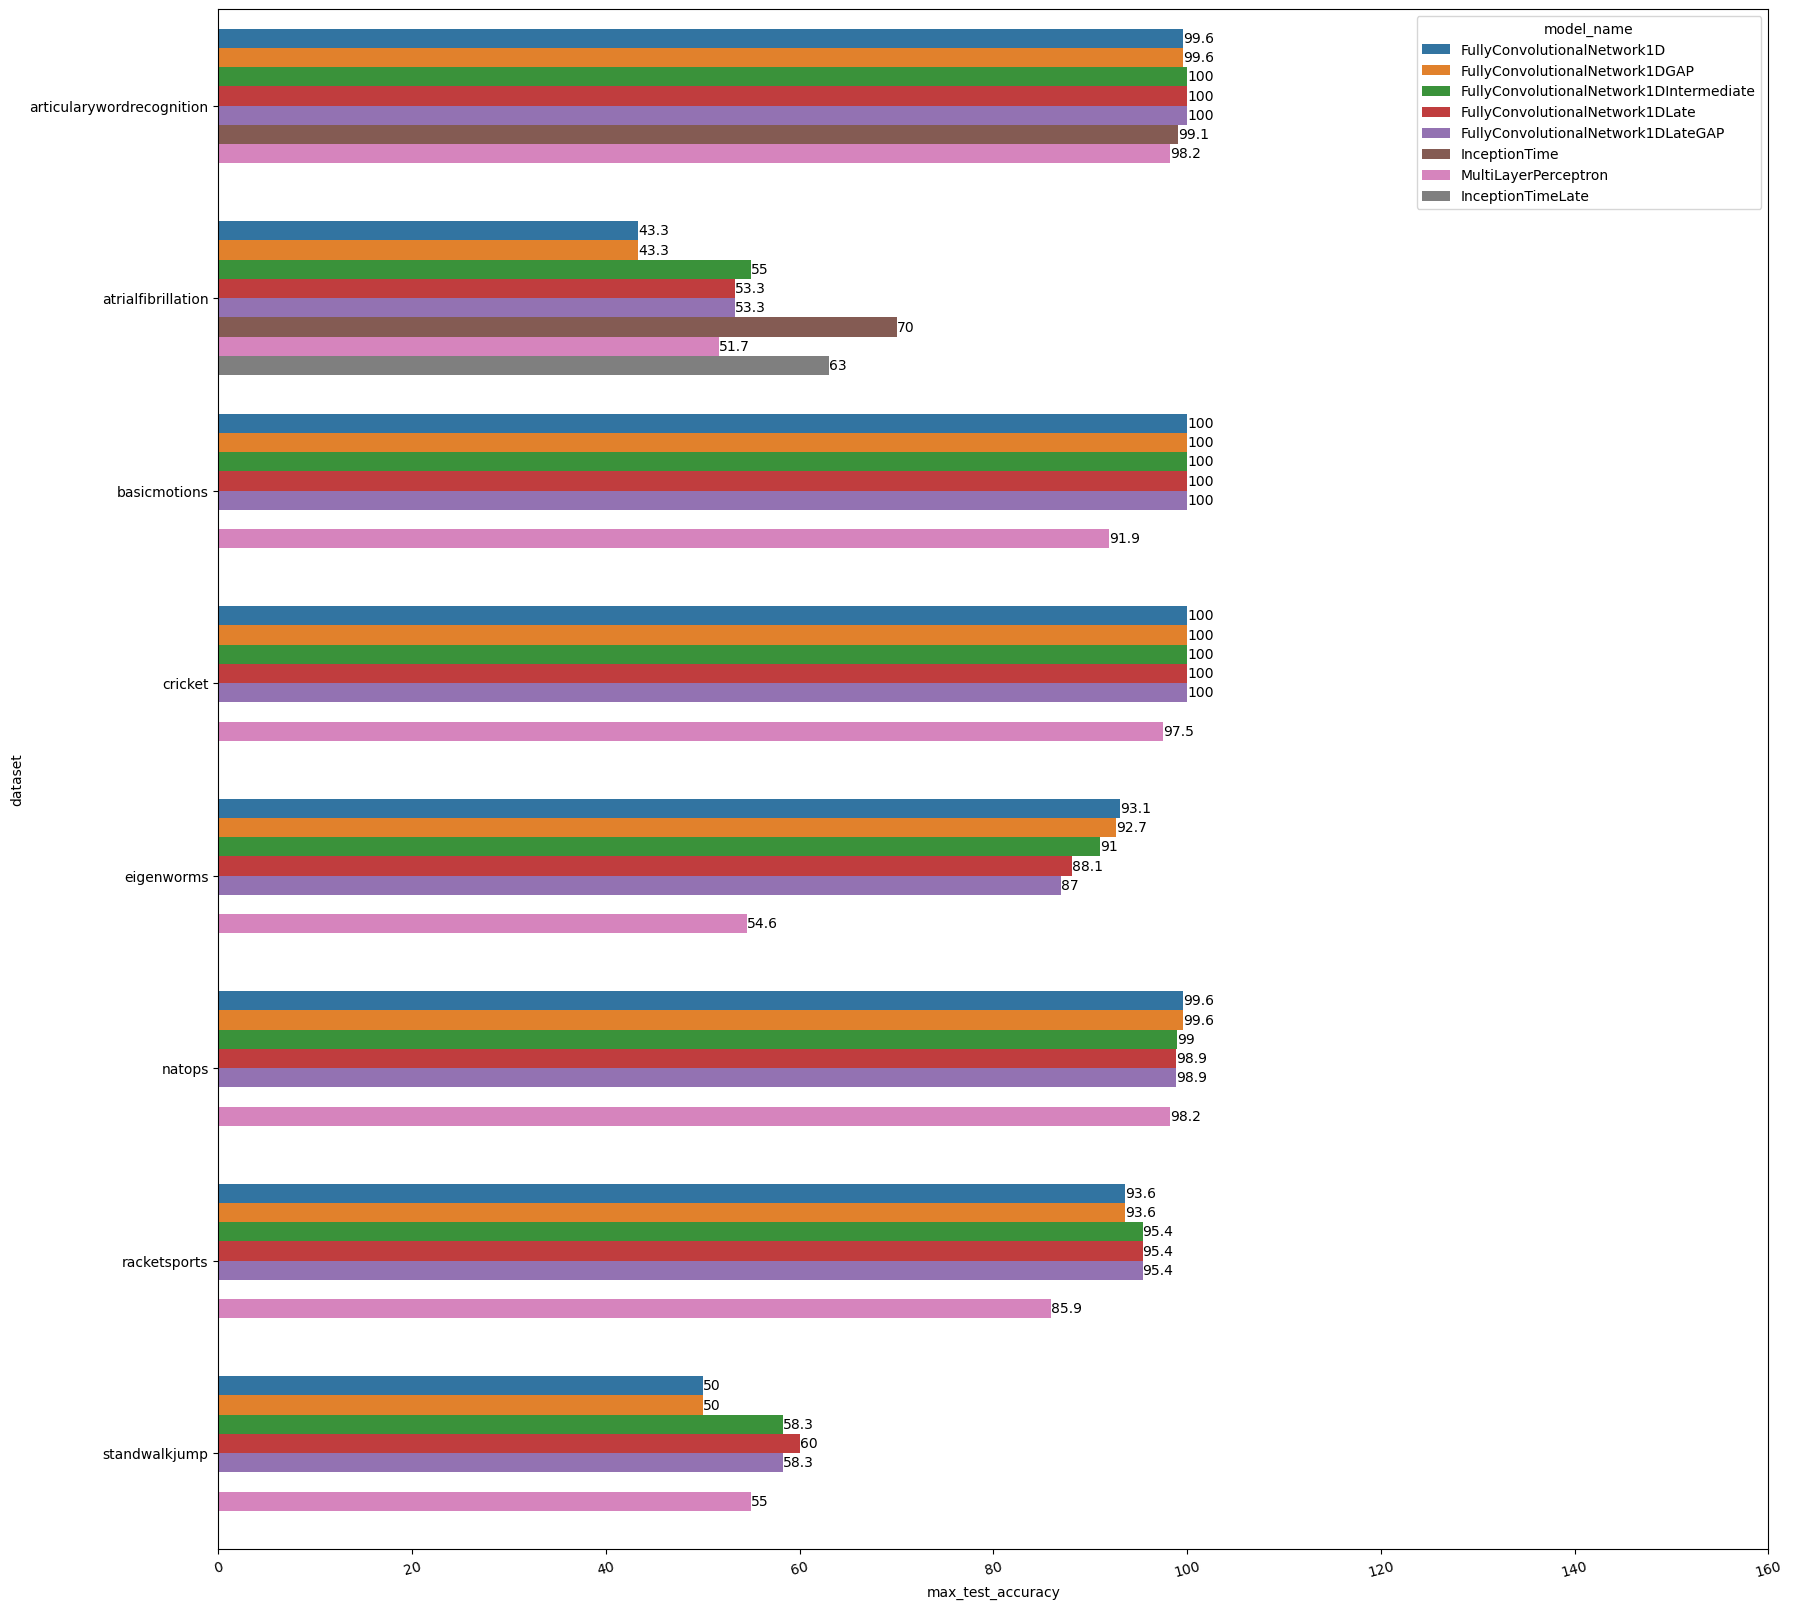

In [12]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data, #.query("model_name != 'InceptionTime'"), 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [13]:
test_tensor = torch.ones(1, 10,4)
conv_test = nn.Conv1d(in_channels= 10, out_channels=10, kernel_size = 1)
result = conv_test(test_tensor)

In [14]:
next(conv_test.parameters()).shape

torch.Size([10, 10, 1])

In [15]:
test_tensor.shape

torch.Size([1, 10, 4])

In [16]:
torch.__version__

'2.5.0+cu121'

In [17]:
result.shape

torch.Size([1, 10, 4])